In [ ]:
!pip install selenium==3.0

In [10]:
from selenium import webdriver

In [11]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get("https://naver.com")

매크로로 실행시 마우스 포커스를 이동하면 안됨.(좌표가 달라진다)

In [ ]:
#이미지작업
!pip install pillow

In [12]:
driver.save_screenshot('naver1.png')

True

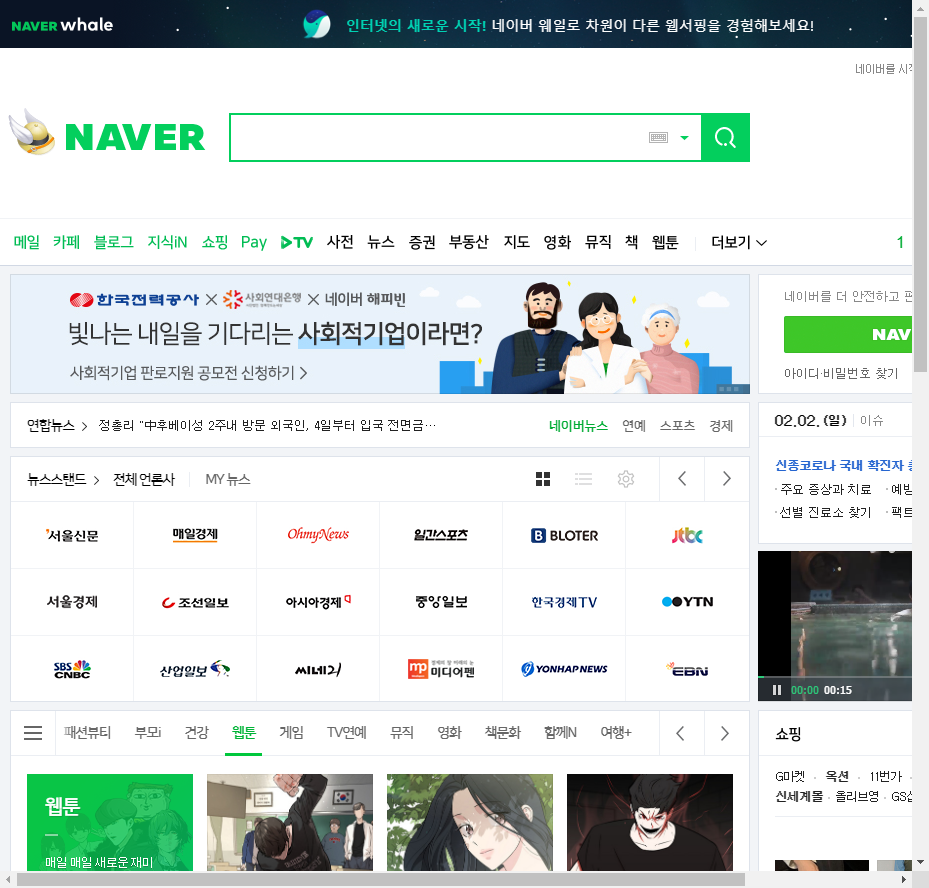

In [13]:
from PIL import Image
Image.open('naver1.png')

In [ ]:
#네이버 홈페이지에 접속한 후 로그인창을 클릭한다
xpath = """//*[@id="account"]/div/a/i"""
driver.find_element_by_xpath(xpath).click()

In [ ]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("hongiktest")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("12345678")

In [ ]:
# 아이디와 패스워드를 입력한 후 로그인창을 클릭한다.
xpath = """//*[@id="account"]/div/a/i"""
driver.find_element_by_xpath(xpath).click()

# 네이버 로그인 접속 성공 후 작업

In [ ]:
driver.get("http://mail.naver.com")

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

html = driver.page_soure
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
raw_list = soup.find_all('div', 'name _ccr(lst.from)')
raw_list

In [ ]:
# 보낸사람 목록 추출하기

send_list = [raw_list[n].find('a').get_text() 
             for n in range(0, len(raw_list))]
send_list

In [ ]:
driver.close()

한국석유공사 접속   www.opinet.co.kr

In [14]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

좌표를 접속해도 처음페이지로 이동한다.

첫화면 -> 주유소/충전소찾기 -> 지역별 -> 서울까지는 클릭해준다.

In [ ]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [ ]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

In [ ]:
# #SIGUNGU_NM0  <<---- 마지막값은 숫자0이다.(주의):개발자폰트권장
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

조회버튼 / 엑셀저장 버튼 좌표추적(xpath)

In [ ]:
#선택한 구의 조회버튼을 클릭한다.
xpath= "조회좌표"
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [ ]:
#선택한 조회항목의 엑셀파일저장 버튼을 클릭한다.
xpath= "엑셀저장좌표"
element_get_excel = driver.find_element_by_xpath(xpath).click()

자동실행

In [ ]:
#진행상황을 그래프(진행율)로 출력한다

!pip install tqdm

In [ ]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(2)
    
    xpath= """//*[@id="searRgSelect"]/span"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    time.sleep(1)
    
    xpath= """//*[@id="glopopd_excel"]/span"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    time.sleep(1)

In [ ]:
driver.close()

In [15]:
import pandas as pd
from glob import glob

In [16]:
glob('./excel/지역*.xls')

['./excel\\지역_위치별(주유소) (1).xls',
 './excel\\지역_위치별(주유소) (10).xls',
 './excel\\지역_위치별(주유소) (11).xls',
 './excel\\지역_위치별(주유소) (12).xls',
 './excel\\지역_위치별(주유소) (13).xls',
 './excel\\지역_위치별(주유소) (14).xls',
 './excel\\지역_위치별(주유소) (15).xls',
 './excel\\지역_위치별(주유소) (16).xls',
 './excel\\지역_위치별(주유소) (17).xls',
 './excel\\지역_위치별(주유소) (18).xls',
 './excel\\지역_위치별(주유소) (19).xls',
 './excel\\지역_위치별(주유소) (2).xls',
 './excel\\지역_위치별(주유소) (20).xls',
 './excel\\지역_위치별(주유소) (21).xls',
 './excel\\지역_위치별(주유소) (22).xls',
 './excel\\지역_위치별(주유소) (23).xls',
 './excel\\지역_위치별(주유소) (24).xls',
 './excel\\지역_위치별(주유소) (3).xls',
 './excel\\지역_위치별(주유소) (4).xls',
 './excel\\지역_위치별(주유소) (5).xls',
 './excel\\지역_위치별(주유소) (6).xls',
 './excel\\지역_위치별(주유소) (7).xls',
 './excel\\지역_위치별(주유소) (8).xls',
 './excel\\지역_위치별(주유소) (9).xls',
 './excel\\지역_위치별(주유소).xls']

In [17]:
stations_files = glob('./excel/지역*.xls')
stations_files

['./excel\\지역_위치별(주유소) (1).xls',
 './excel\\지역_위치별(주유소) (10).xls',
 './excel\\지역_위치별(주유소) (11).xls',
 './excel\\지역_위치별(주유소) (12).xls',
 './excel\\지역_위치별(주유소) (13).xls',
 './excel\\지역_위치별(주유소) (14).xls',
 './excel\\지역_위치별(주유소) (15).xls',
 './excel\\지역_위치별(주유소) (16).xls',
 './excel\\지역_위치별(주유소) (17).xls',
 './excel\\지역_위치별(주유소) (18).xls',
 './excel\\지역_위치별(주유소) (19).xls',
 './excel\\지역_위치별(주유소) (2).xls',
 './excel\\지역_위치별(주유소) (20).xls',
 './excel\\지역_위치별(주유소) (21).xls',
 './excel\\지역_위치별(주유소) (22).xls',
 './excel\\지역_위치별(주유소) (23).xls',
 './excel\\지역_위치별(주유소) (24).xls',
 './excel\\지역_위치별(주유소) (3).xls',
 './excel\\지역_위치별(주유소) (4).xls',
 './excel\\지역_위치별(주유소) (5).xls',
 './excel\\지역_위치별(주유소) (6).xls',
 './excel\\지역_위치별(주유소) (7).xls',
 './excel\\지역_위치별(주유소) (8).xls',
 './excel\\지역_위치별(주유소) (9).xls',
 './excel\\지역_위치별(주유소).xls']

주유소 엑셀파일 통합

In [18]:
# concat() 함수를 사용하여 엑셀파일들을 통합할 수 있다.
# 통합하고자 하는 엑셀의 필드구분이 같아야 한다.

tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [19]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1575,1427,-
1,서울특별시,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1815,1585,1429,-
2,서울특별시,고속셀프주유소,서울 강동구 천호대로 1246,SK에너지,02-487-2030,Y,1925,1595,1435,1179
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1595,1415,-
4,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1596,1476,1147
...,...,...,...,...,...,...,...,...,...,...
37,서울특별시,오천주유소,서울 강남구 봉은사로 503 (삼성동),SK에너지,02-545-2822,N,2289,1999,1879,1319
38,서울특별시,금성주유소,서울 강남구 테헤란로 619 (삼성동),SK에너지,02-508-6572,N,2189,1999,1895,-
39,서울특별시,뉴서울(강남),서울 강남구 언주로 716 (논현동),SK에너지,02-518-5631,N,2498,2218,2038,1460
40,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-


In [20]:
len(station_raw)

502

In [21]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 41
Data columns (total 10 columns):
지역       502 non-null object
상호       502 non-null object
주소       502 non-null object
상표       502 non-null object
전화번호     502 non-null object
셀프여부     502 non-null object
고급휘발유    502 non-null object
휘발유      502 non-null object
경유       502 non-null object
실내등유     502 non-null object
dtypes: object(10)
memory usage: 43.1+ KB


In [22]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1575,1427,-
1,서울특별시,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1815,1585,1429,-
2,서울특별시,고속셀프주유소,서울 강동구 천호대로 1246,SK에너지,02-487-2030,Y,1925,1595,1435,1179
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1595,1415,-
4,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1596,1476,1147


In [23]:
#챠트로 작업할 필요한 정보만 추출한다.

stations = pd.DataFrame({'oil_store': station_raw['상호'], 
                        '주소': station_raw['주소'], 
                        '가격': station_raw['휘발유'], 
                        '셀프': station_raw['셀프여부'], 
                        '상표': station_raw['상표']})
stations.head()

,oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,현대오일뱅크
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1585,N,SK에너지
2,고속셀프주유소,서울 강동구 천호대로 1246,1595,Y,SK에너지
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지


In [24]:
stations['구'] = [eachAddress.split()[1] 
                 for eachAddress in stations['주소']]
stations.head()

,oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,현대오일뱅크,강동구
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1585,N,SK에너지,강동구
2,고속셀프주유소,서울 강동구 천호대로 1246,1595,Y,SK에너지,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스,강동구
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지,강동구


In [25]:
stations[stations['구']=='서울특별시']

,oil_store,주소,가격,셀프,상표,구


In [26]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [27]:
stations[stations['구']=='특별시']

,oil_store,주소,가격,셀프,상표,구


In [28]:
stations[stations['가격']=='-']

,oil_store,주소,가격,셀프,상표,구
11,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
21,(주)새서울석유 대원셀프주유소,서울 구로구 개봉로 7,-,Y,SK에너지,구로구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [30]:
stations = stations[stations['가격']!='-']
stations.head()

,oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1575,N,현대오일뱅크,강동구
1,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1585,N,SK에너지,강동구
2,고속셀프주유소,서울 강동구 천호대로 1246,1595,Y,SK에너지,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1595,Y,GS칼텍스,강동구
4,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1596,N,SK에너지,강동구


In [29]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 41
Data columns (total 6 columns):
oil_store    502 non-null object
주소           502 non-null object
가격           502 non-null object
셀프           502 non-null object
상표           502 non-null object
구            502 non-null object
dtypes: object(6)
memory usage: 27.5+ KB


In [31]:
stations['가격'] = [float(value) for value in stations['가격']]

In [32]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 0 to 39
Data columns (total 6 columns):
oil_store    496 non-null object
주소           496 non-null object
가격           496 non-null float64
셀프           496 non-null object
상표           496 non-null object
구            496 non-null object
dtypes: float64(1), object(5)
memory usage: 27.1+ KB


챠트 & 그래프에서 한글 오류 발생할 경우 아래구문으로 해결

In [33]:
!pip install seaborn

In [34]:
#%%writefile "C:/Users/Python/Desktop/py/share/팬더스_그래프_폰트설정.txt"

import platform
import matplotlib.pyplot as plt
import seaborn as sns

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

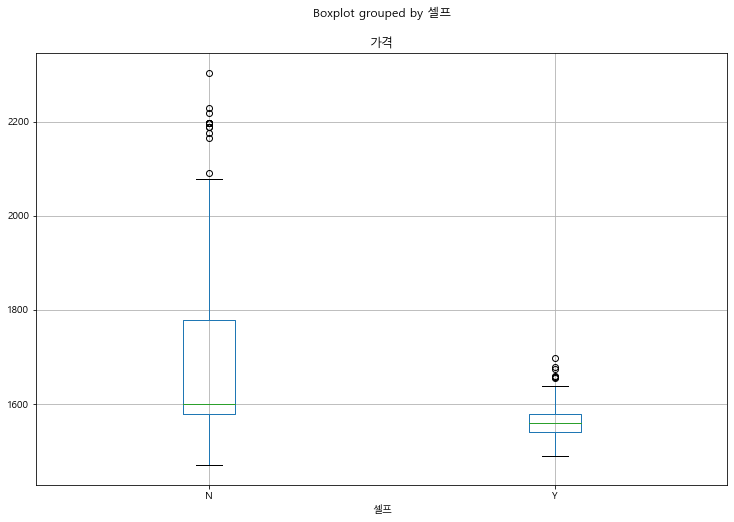

In [35]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

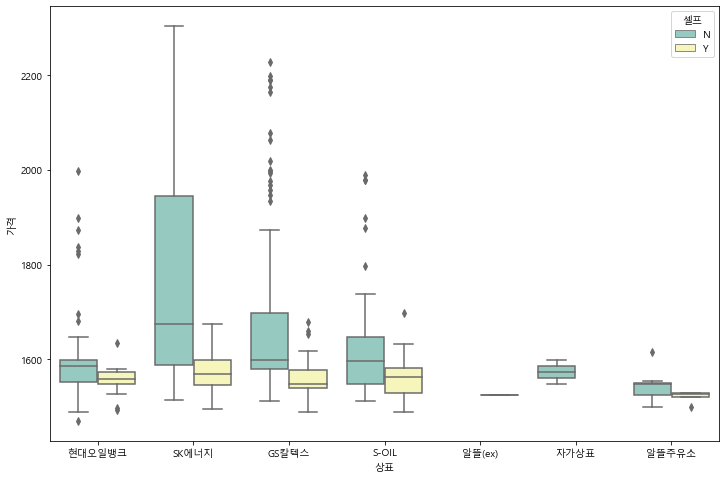

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', 
           data=stations, palette='Set3')
plt.show()

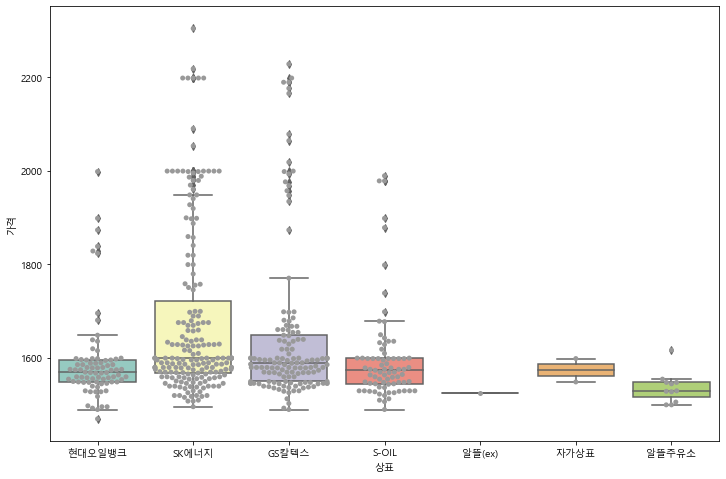

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color=".6")
plt.show()

In [38]:
import json
import folium
import googlemaps
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
#서울시에서 가장 비싼 주유소 10개 검색

stations.sort_values(by='가격', ascending=False).head(10)

,oil_store,주소,가격,셀프,상표,구
11,서남주유소,서울 중구 통일로 30,2304.0,N,SK에너지,중구
10,SC(주) 역전주유소,서울 중구 퇴계로 15,2228.0,N,GS칼텍스,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
13,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
9,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구
8,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구
12,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구
7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
7,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2189.0,N,GS칼텍스,중구


In [43]:
#서울시에서 가장 싼 주유소 10개 검색
stations.sort_values(by='가격',ascending=True).head(10)

,oil_store,주소,가격,셀프,상표,구
0,웰컴주유소,서울 동대문구 한천로 414 (이문동),1469.0,N,현대오일뱅크,동대문구
2,수유동주유소,서울 강북구 도봉로 395 (수유동),1489.0,Y,GS칼텍스,강북구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1489.0,N,현대오일뱅크,강북구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1489.0,Y,S-OIL,강북구
1,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1492.0,Y,GS칼텍스,성북구
0,강산제2주유소,서울 성북구 보국문로 52,1492.0,Y,현대오일뱅크,성북구
1,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1495.0,Y,SK에너지,도봉구
0,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1495.0,N,현대오일뱅크,도봉구
2,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1495.0,N,현대오일뱅크,도봉구
0,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1497.0,Y,현대오일뱅크,은평구


In [45]:
#서울시 각 구별 주유소 평균값
import numpy as np

gu_data = pd. pivot_table(stations, index=['구'], values=['가격'], 
                         aggfunc=np.mean)
gu_data.head(26)

,가격
구,
강남구,1769.000000
강동구,1638.875000
강북구,1529.769231
강서구,1587.529412
관악구,1595.312500
광진구,1571.411765
구로구,1616.619048
금천구,1567.538462
노원구,1619.400000


In [47]:
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path, encoding='utf-8'))

map=folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str, data = gu_data, columns = [gu_data.index, '가격'],
              fill_color='PuRd', key_on='feature.id')
map

In [48]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,oil_store,주소,가격,셀프,상표,구
11,서남주유소,서울 중구 통일로 30,2304.0,N,SK에너지,중구
10,SC(주) 역전주유소,서울 중구 퇴계로 15,2228.0,N,GS칼텍스,중구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2218.0,N,SK에너지,강남구
13,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
9,장충주유소,서울 중구 장충단로 202 (장충동1가),2198.0,N,SK에너지,중구
8,(주)중앙에너비스 퇴계로지점,서울 중구 퇴계로 228 (필동2가),2198.0,N,SK에너지,중구
12,에너비스,서울 용산구 한남대로 82 (한남동),2198.0,N,SK에너지,용산구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2198.0,N,GS칼텍스,종로구
7,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2198.0,N,SK에너지,종로구
7,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2189.0,N,GS칼텍스,중구


In [49]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,oil_store,주소,가격,셀프,상표,구
0,웰컴주유소,서울 동대문구 한천로 414 (이문동),1469.0,N,현대오일뱅크,동대문구
2,수유동주유소,서울 강북구 도봉로 395 (수유동),1489.0,Y,GS칼텍스,강북구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1489.0,N,현대오일뱅크,강북구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1489.0,Y,S-OIL,강북구
1,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1492.0,Y,GS칼텍스,성북구
0,강산제2주유소,서울 성북구 보국문로 52,1492.0,Y,현대오일뱅크,성북구
1,SK네트웍스(주)도봉행복주유소,서울 도봉구 도봉로 941 (도봉동),1495.0,Y,SK에너지,도봉구
0,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1495.0,N,현대오일뱅크,도봉구
2,한이에너지(주)KLP제1주유소,서울 도봉구 도봉로 596 (창동),1495.0,N,현대오일뱅크,도봉구
0,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1497.0,Y,현대오일뱅크,은평구


In [50]:
gmap_key= '구글 API 키값'
gmaps = googlemaps.Client(key = gmap_key)

ValueError: Invalid API key provided.

In [52]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    #예외처리 -> 오류발생시 실행할 구문
    try: 
        tmp_add = str(oil_price_top10['주소'][n].split('(')[0]
        tmp_map = gmpas.geocode(tmp_add)
                      
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
                      
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('hear in nan !!')

            
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

SyntaxError: invalid syntax (<ipython-input-52-76b7e7554156>, line 10)